# Análisis del sismo ocurrido en México el 7 de septiembre del 2021
Análisis de los sismogramas generados por la estación **UNM** ubicada en la Ciudad de México perteneciente a la red **G** de estaciones sísmicas, los datos se encuentran en banda ancha de los 3 canales.

## Importación y análisis exploratorio de datos
Se descargaron alrededor los datos de la plataforma [IRIS](https://www.iris.edu/hq/) en formato `.SAC`, abarcando 5 minutos antes de la llegada de la onda *P* y 60 minutos (1 hora) después de llegada la misma.

In [1]:
# Se importan las librerías necesarias para el análisis y graficación de los datos
import obspy

st = obspy.read("2021-09-08-mww70-near-coast-of-guerrero-mexico/*.SAC")
print(st)

3 Trace(s) in Stream:
G.UNM.00.BHE | 2021-09-08T01:43:25.000000Z - 2021-09-08T02:48:25.000000Z | 20.0 Hz, 78001 samples
G.UNM.00.BHN | 2021-09-08T01:43:25.000000Z - 2021-09-08T02:48:25.000000Z | 20.0 Hz, 78001 samples
G.UNM.00.BHZ | 2021-09-08T01:43:25.000000Z - 2021-09-08T02:48:25.000000Z | 20.0 Hz, 78001 samples


In [2]:
# Metadatos de uno de los canales
print(st[0].stats)

         network: G
         station: UNM
        location: 00
         channel: BHE
       starttime: 2021-09-08T01:43:25.000000Z
         endtime: 2021-09-08T02:48:25.000000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 78001
           calib: 4.47124e+09
         _format: SAC
             sac: AttribDict({'delta': 0.050000001, 'scale': 4.4712402e+09, 'b': 0.0, 'e': 3900.0, 'o': 262.0, 'stla': 19.329662, 'stlo': -99.178062, 'stel': 2280.0, 'stdp': 0.0, 'evla': 16.9816, 'evlo': -99.772598, 'evdp': 20.0, 'dist': 267.16797, 'az': 13.516257, 'baz': 193.70044, 'gcarc': 2.4028056, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2021, 'nzjday': 251, 'nzhour': 1, 'nzmin': 43, 'nzsec': 25, 'nzmsec': 0, 'nvhdr': 6, 'npts': 78001, 'iftype': 1, 'leven': 1, 'kstnm': 'UNM', 'kevnm': 'Near Coast Of Gu', 'khole': '00', 'kcmpnm': 'BHE', 'knetwk': 'G', 'kinst': 'STRECKEI'})


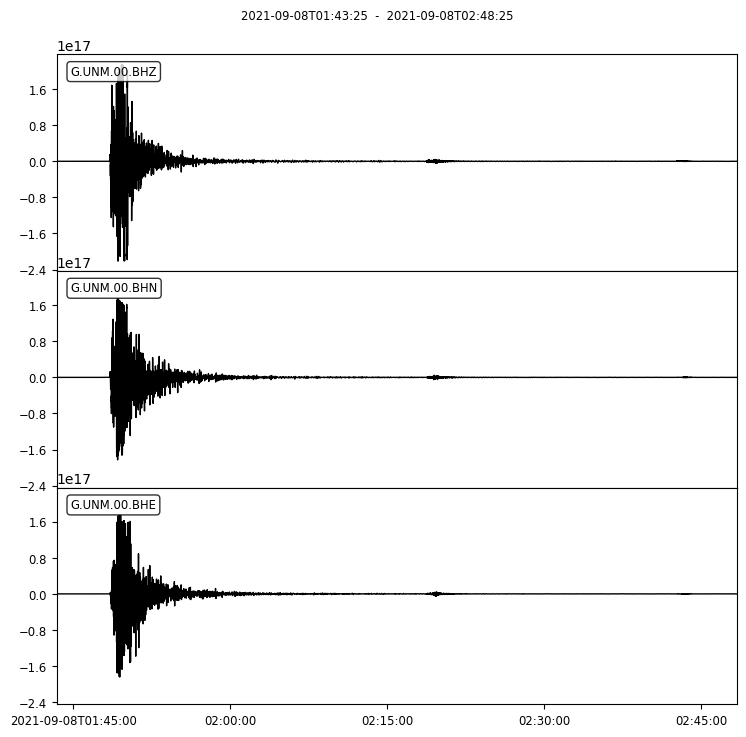

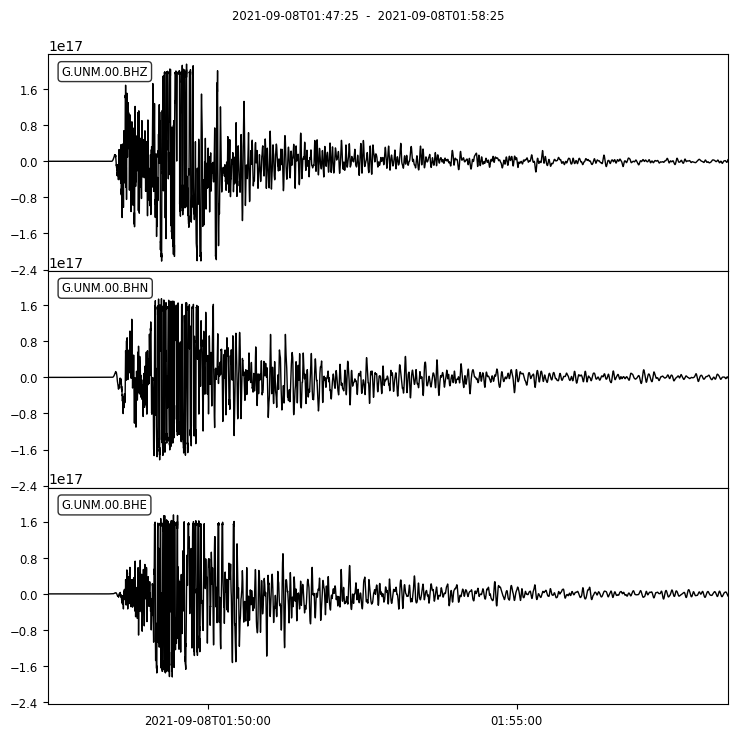

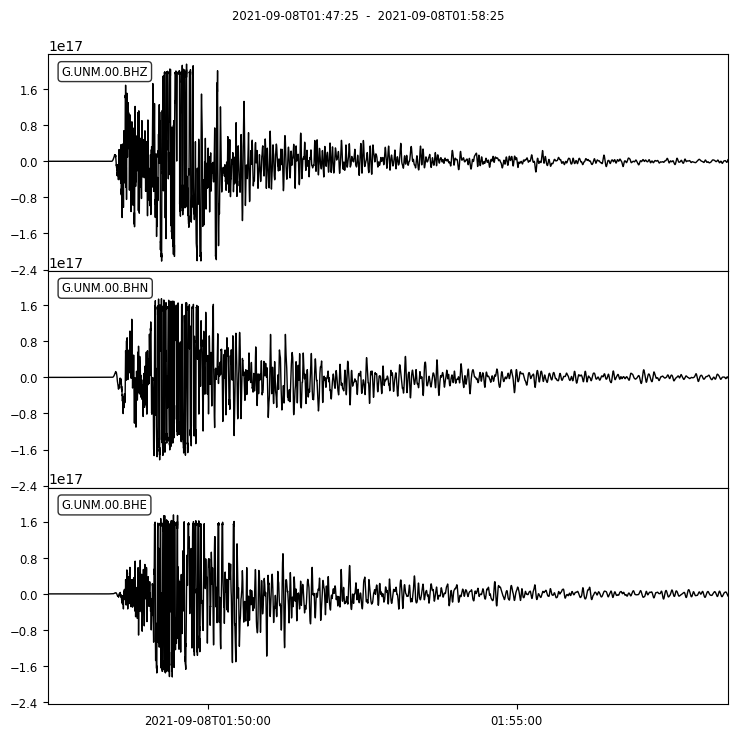

In [3]:
starttime = st[0].stats.starttime + 4*60
endtime = st[0].stats.endtime - 50*60

st_trim = st.copy()

st_trim.trim(starttime=starttime, endtime=endtime)

st.plot()
st_trim.plot()

In [4]:
st_trim[0].stats.sampling_rate

20.0

In [5]:
st_dec = st_trim.copy()

st_dec.decimate(2)

3 Trace(s) in Stream:
G.UNM.00.BHE | 2021-09-08T01:47:25.000000Z - 2021-09-08T01:58:25.000000Z | 10.0 Hz, 6601 samples
G.UNM.00.BHN | 2021-09-08T01:47:25.000000Z - 2021-09-08T01:58:25.000000Z | 10.0 Hz, 6601 samples
G.UNM.00.BHZ | 2021-09-08T01:47:25.000000Z - 2021-09-08T01:58:25.000000Z | 10.0 Hz, 6601 samples

In [6]:
st_dec[0].stats.sampling_rate

10.0

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

3 Trace(s) in Stream:
G.UNM.00.BHE | 2021-09-08T01:47:47.000000Z - 2021-09-08T01:57:47.000000Z | 20.0 Hz, 12001 samples
G.UNM.00.BHN | 2021-09-08T01:47:47.000000Z - 2021-09-08T01:57:47.000000Z | 20.0 Hz, 12001 samples
G.UNM.00.BHZ | 2021-09-08T01:47:47.000000Z - 2021-09-08T01:57:47.000000Z | 20.0 Hz, 12001 samples


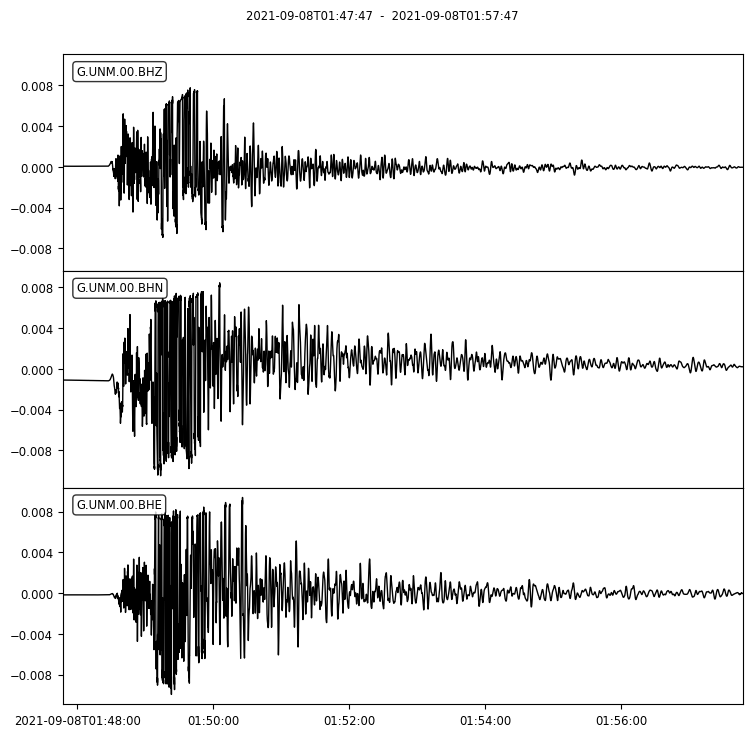

In [8]:
client = Client('IRIS')
time = UTCDateTime("2021-09-08T01:47:47")
starttime = time
endtime = time + 10*60

net = "G"
sta = "UNM"
loc = "00"
chan = "BH*"

st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response=True)
print(st)

waveforms = st.copy()

st.remove_response(output = 'VEL')

st.plot();

In [9]:
BHE_data = st[0].data
BHE_times = st[0].times()

BHN_data = st[1].data
BHN_times = st[1].times()

BHZ_data = st[2].data
BHZ_times = st[2].times()

In [10]:
BHE_times_mpl = st[0].times(type='matplotlib')
BHN_times_mpl = st[1].times(type='matplotlib')
BHZ_times_mpl = st[2].times(type='matplotlib')

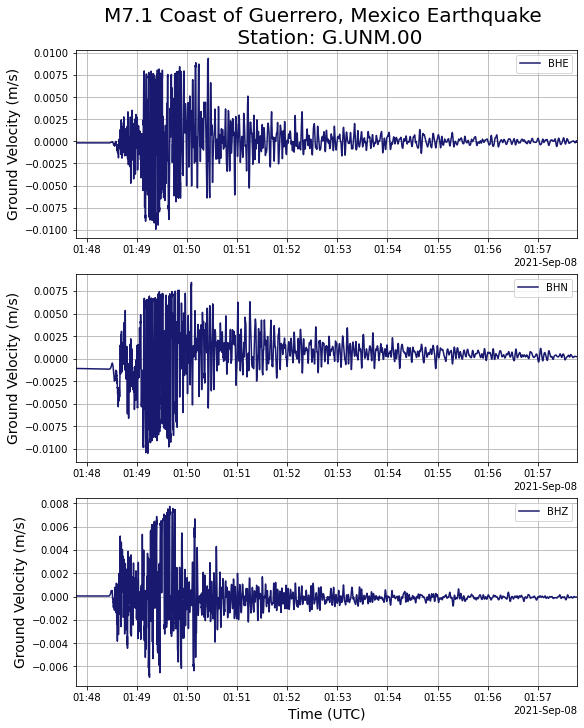

In [11]:
fig, ax = plt.subplots(3, 1, constrained_layout=True, figsize=(8, 10))

ax[0].set_title('M7.1 Coast of Guerrero, Mexico Earthquake \n Station: ' + net + '.' + sta + '.' + loc, fontsize=20)

ax[0].plot(BHE_times_mpl, BHE_data, label='BHE', color='midnightblue')
ax[0].set_xlim(BHE_times_mpl[1], BHE_times_mpl[-1])
ax[0].set_ylabel('Ground Velocity (m/s)', fontsize=14)
ax[0].grid()
ax[0].legend()

locator = ax[0].xaxis.set_major_locator(mdates.AutoDateLocator())
ax[0].xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

ax[1].plot(BHN_times_mpl, BHN_data, label='BHN', color='midnightblue')
ax[1].set_xlim(BHZ_times_mpl[1], BHZ_times_mpl[-1])
ax[1].set_ylabel('Ground Velocity (m/s)', fontsize=14)
ax[1].grid()
ax[1].legend()

locator1 = ax[1].xaxis.set_major_locator(mdates.AutoDateLocator())
ax[1].xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator1))

ax[2].plot(BHZ_times_mpl, BHZ_data, label='BHZ', color='midnightblue')
ax[2].set_xlim(BHZ_times_mpl[1], BHZ_times_mpl[-1])
ax[2].set_ylabel('Ground Velocity (m/s)', fontsize=14)
ax[2].set_xlabel('Time (UTC)', fontsize=14)
ax[2].grid()
ax[2].legend()

locator2 = ax[2].xaxis.set_major_locator(mdates.AutoDateLocator())
ax[2].xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator2))

In [12]:
cat = client.get_events(starttime=starttime, endtime=endtime)
inv = client.get_stations(network="IU", station="MAJO", level="response")
coords = inv.get_coordinates("IU.MAJO.00.BH1")

print(coords)

{'latitude': 36.54567, 'longitude': 138.20406, 'elevation': 405.0, 'local_depth': 0.0}


/home/jcbucio/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/core/inventory/network.py:324: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


In [13]:
from obspy.geodetics import locations2degrees

origin = cat[0].preferred_origin()
distance = locations2degrees(origin.latitude, origin.longitude, coords["latitude"], coords["longitude"])

print(distance)

94.0060930605


In [14]:
import numpy as np
from obspy.taup import TauPyModel

model = TauPyModel(model="ak135")

arrivals = model.get_travel_times(distance_in_degree=distance, source_depth_in_km=origin.depth / 1000.0, phase_list=["P", "S"])
print(arrivals)

2 arrivals
	P phase arrival at 799.666 seconds
	S phase arrival at 1471.044 seconds


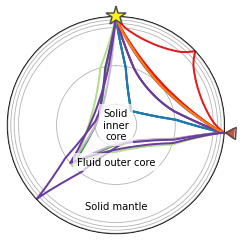

In [15]:
arrivals = model.get_ray_paths(distance_in_degree=distance, source_depth_in_km=origin.depth / 1000.0, phase_list=["ttbasic"])

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

ax = arrivals.plot_rays(plot_type='spherical', legend=False, plot_all=True, show=False, ax=ax)

ax.text(0, 0, 'Solid\ninner\ncore', horizontalalignment='center', 
verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet - (model.model.s_mod.v_mod.iocb_depth + model.model.s_mod.v_mod.cmb_depth) / 2)
ax.text(np.deg2rad(180), ocr, 'Fluid outer core', horizontalalignment='center', 
bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax.text(np.deg2rad(180), mr, 'Solid mantle', horizontalalignment='center', 
bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

In [16]:
cat = client.get_events(starttime=starttime, endtime=endtime)
inv = client.get_stations(network="G", station="UNM", level="response")
coords = inv.get_coordinates("G.UNM.00.BHE")

origin = cat[0].preferred_origin()
distance = locations2degrees(origin.latitude, origin.longitude, coords["latitude"], coords["longitude"])

print("Latitude: " + str(coords['latitude']))
print("Longitude: " + str(coords['longitude']))
print("Distance in degrees: " + str(distance))

Latitude: 19.329662
Longitude: -99.178065
Distance in degrees: 19.3677993225


/home/jcbucio/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/core/inventory/network.py:324: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


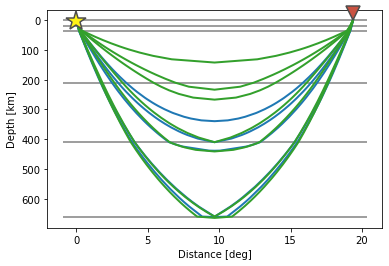

In [17]:
arrivals = model.get_ray_paths(distance_in_degree=distance, source_depth_in_km=origin.depth / 1000.0, phase_list=["P", "S"])

ax = arrivals.plot_rays(plot_type="cartesian", phase_list=["P", "S"], plot_all=False)